# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

torch.Size([1, 100])


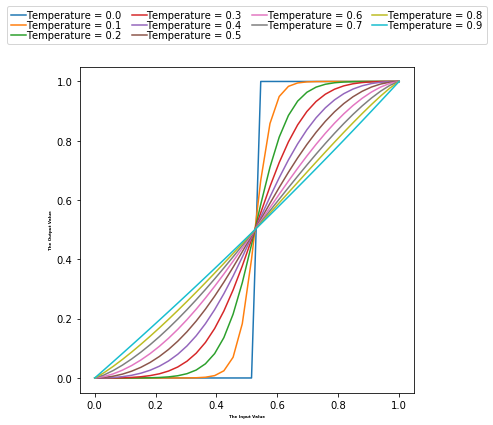

In [1]:
%matplotlib inline
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
x=torch.linspace(-2,1,100).reshape(1,100)
temperature=torch.linspace(0,1,10)
print(x.shape)
labels = []
beta=torch.tensor(0.01/3.)

plt.subplots(figsize=(6,6))
axes = plt.gca()

for i in range(temperature.shape[0]):
    y=torch.sigmoid((torch.log(x)-torch.log(1-x)+torch.log(torch.tensor(0.9)))/temperature[i])
    plt.plot(np.array(x).squeeze(),np.array(y).squeeze())
    labels.append(r'Temperature = {:.1f}' .format(0.1*i))

plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.2], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=False)

plt.xlabel("The Input Value",fontsize=4,fontweight='bold')
plt.ylabel("The Output Value",fontsize=4,fontweight='bold')

plt.savefig('temperature.png', dpi=1000,bbox_inches='tight')
plt.show()

In [1]:
from l0_layers import L0Pair
import torch
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
layer1 = L0Pair(10, 7, droprate_init=0.2, weight_decay=0.001, lambda_l0=0.1).to(device)
output = layer1(torch.ones(64,10).to(device))
#print(output)
layer1.sample_mask()

cpu


C:\Users\Cooper\anaconda\Anaconda3\envs\NIPS\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[1., 1., 1., 1., 1., 1., 1.]], grad_fn=<ViewBackward>)

In [2]:
torch.cuda.is_available()

False

In [3]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from disentanglement_lib.data.ground_truth import dsprites
import os
import torch
from tensorflow import gfile
import numpy as np
import warnings
warnings.filterwarnings('ignore')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

dsprites.DSprites
IMAGE_PATH = 'C:/Users/Cooper/ISO/PrunedVAE/img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'
DSPRITES_PATH = "C:/Users/Cooper/FYP/Variational-Ladder-Autoencoder/dataset/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
with gfile.Open(DSPRITES_PATH, "rb") as data_file:
    # Data was saved originally using python2, so we need to set the encoding.
    data = np.load(data_file, encoding="latin1", allow_pickle=True)
# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())
print(data["imgs"].shape)

162079 20259 20261
torch.Size([128, 3, 64, 64])
(737280, 64, 64)


import torch
import numpy as np
import torch.utils.data as utils
from PIL import Image
from torch.nn.functional import normalize
trans = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#print(np.mean(data["imgs"]),np.std(data["imgs"]))
#####train
#print(normalize(torch.tensor(data["imgs"]).to(dtype=torch.float32)).min())
train_x = normalize(torch.tensor(data["imgs"][:649600,:,:]).to(dtype=torch.float16)) # a list of numpy arrays
train_y = torch.zeros((data["imgs"][:649600,:,:].shape[0],1)) # another list of numpy arrays (targets)
train_set = utils.TensorDataset(train_x,train_y) # create your datset
train_loader = utils.DataLoader(train_set, batch_size=64) # create your dataloader

#####test
test_x = normalize(torch.tensor(data["imgs"][649600:704000,:,:]).to(dtype=torch.float32)) # a list of numpy arrays
test_y = torch.zeros((data["imgs"][649600:704000,:,:].shape[0],1)) # another list of numpy arrays (targets)
test_set = utils.TensorDataset(test_x,test_y) # create your datset
test_loader = utils.DataLoader(test_set, batch_size=64) # create your dataloader

#####valid
valid_x = normalize( torch.tensor(data["imgs"][700000:,:,:]).to(dtype=torch.float32))# a list of numpy arrays
valid_y = torch.zeros((data["imgs"][700000:,:,:].shape[0],1)) # another list of numpy arrays (targets)
valid_set = utils.TensorDataset(valid_x,valid_y) # create your datset
valid_loader = utils.DataLoader(valid_set, batch_size=64) # create your dataloader


In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader, MorphoMNISTDataset, DSpritesDataset
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VLAE_model import VLAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np

#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)
#train_loader = get_MorphoMNIST("train")
#test_loader = get_MorphoMNIST("test")

transformations = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])#, transforms.Resize(32)
train = DSpritesDataset("train",transformations)
test = DSpritesDataset("test",transformations)
train_loader = DataLoader(train,
                          batch_size=128,
                          shuffle=True,
                          num_workers=4
                         # pin_memory=True # CUDA only
                         )


(60000, 6)
(60000, 10)
(60000, 17)
(10000, 6)
(10000, 10)
(10000, 17)


### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader, MorphoMNISTDataset, DSpritesDataset
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.VLAE64_model import VLAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np
#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)
#train_loader = get_MorphoMNIST("train")
#test_loader = get_MorphoMNIST("test")

transformations = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])#, transforms.Resize(32)
train = DSpritesDataset("train",transformations)
test = DSpritesDataset("test",transformations)
label_size = train.get_label_size()
train_loader = DataLoader(train,
                          batch_size=128,
                          shuffle=True,
                          num_workers=0
                         # pin_memory=True # CUDA only
                         )
test_loader = DataLoader(test,
                          batch_size=500,
                          shuffle=True,
                          num_workers=0
                         # pin_memory=True # CUDA only
                         )
# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
# n_cont = 10
# disc = []
# n_disc = len(disc)
# latent_spec = {'cont': n_cont,
#                'disc': disc}
ladder_dim = [3, 3, 3, 3]

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(1, 64, 64)).cuda()
model = VLAE(img_size=(1, 64, 64), ladder_dim=ladder_dim).cuda()
print(model)

lr=0.0001
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                        # over 25000 iterations with a gamma of 30.0
lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 20*lambda_d 
path="C:/Users/Cooper/FYP/FYP-of-Disentanglement-master/FYP-of-Disentanglement-master/models"
# Build a trainer
trainer = Trainer(model, optimizer,label_size=label_size,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
# viz = Visualizer(model)
print(model.parameters)

VLAE(
  (inference3): Sequential(
    (0): Flatten()
    (1): Linear(in_features=512, out_features=1024, bias=True)
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
  )
  (inference2): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(512, eps=1e-05, mo

In [ ]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,test_loader, epochs=10)
end = time.time()
print(end - start)
torch.save(trainer.best_model.state_dict(), 'models/model433_params.pkl')
torch.save(trainer.best_model, './models/433')


0/663552	Loss: 2517.970	L0 Loss: 0.000
tensor(0.1230, device='cuda:0')
tensor(0.3022, device='cuda:0')
Plot Saved!!
Regularization Loss: 4.584,Recon Loss: 1792.512	 Recon Error: 0.438
2377.5442108979096
6400/663552	Loss: 714.806	L0 Loss: 0.000
12800/663552	Loss: 692.248	L0 Loss: 0.000
19200/663552	Loss: 674.182	L0 Loss: 0.000
25600/663552	Loss: 666.612	L0 Loss: 0.000
32000/663552	Loss: 671.724	L0 Loss: 0.000
38400/663552	Loss: 668.311	L0 Loss: 0.000
44800/663552	Loss: 645.775	L0 Loss: 0.000
51200/663552	Loss: 626.380	L0 Loss: 0.000
57600/663552	Loss: 606.375	L0 Loss: 0.000
64000/663552	Loss: 597.621	L0 Loss: 0.000
70400/663552	Loss: 594.535	L0 Loss: 0.000
76800/663552	Loss: 591.608	L0 Loss: 0.000
83200/663552	Loss: 593.824	L0 Loss: 0.000
89600/663552	Loss: 594.914	L0 Loss: 0.000
96000/663552	Loss: 593.504	L0 Loss: 0.000
102400/663552	Loss: 588.064	L0 Loss: 0.000
108800/663552	Loss: 591.974	L0 Loss: 0.000
115200/663552	Loss: 591.793	L0 Loss: 0.000
121600/663552	Loss: 585.601	L0 Loss: 0.

In [5]:
len(train_loader.dataset)

663552

In [3]:
ladder_dim = [3, 3, 3]

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(1, 64, 64)).cuda()
model = VLAE(img_size=(1, 28, 28), ladder_dim=ladder_dim).cuda()
print(model)


lr=0.0001
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
lambda_d = 0
lambda_od = 10*lambda_d
lambda_dis = 20*lambda_d 
path="./Visualizations/"
# Build a trainer
trainer = Trainer(model, optimizer,label_size=label_size,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
# viz = Visualizer(model)
import time

start = time.time()
trainer.train(train_loader,test_loader, epochs=50)
end = time.time()
print(end - start)

VLAE(
  (inference0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Flatten()
    (7): Linear(in_features=3200, out_features=1024, bias=True)
  )
  (inference1): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (ladder0): Sequent

0/60000	Loss: 267.156	L0 Loss: 0.000
6400/60000	Loss: 270.588	L0 Loss: 0.000
12800/60000	Loss: 265.290	L0 Loss: 0.000
19200/60000	Loss: 257.745	L0 Loss: 0.000
25600/60000	Loss: 271.130	L0 Loss: 0.000
32000/60000	Loss: 249.624	L0 Loss: 0.000
38400/60000	Loss: 267.187	L0 Loss: 0.000
44800/60000	Loss: 292.942	L0 Loss: 0.000
51200/60000	Loss: 273.634	L0 Loss: 0.000
57600/60000	Loss: 256.025	L0 Loss: 0.000
Epoch: 6 Average loss: 270.20 Valid loss: 259.0765380859375	Recon Error:0.017
tensor(0.1623, device='cuda:0')
tensor(0.6164, device='cuda:0')
Plot Saved!!
Plot Saved!!
Regularization Loss: 27.076,Recon Loss: 12.642	 Recon Error: 0.016
250.6574249267578
0/60000	Loss: 266.157	L0 Loss: 0.000
6400/60000	Loss: 258.005	L0 Loss: 0.000
12800/60000	Loss: 262.338	L0 Loss: 0.000
19200/60000	Loss: 278.205	L0 Loss: 0.000
25600/60000	Loss: 245.737	L0 Loss: 0.000
32000/60000	Loss: 261.575	L0 Loss: 0.000
38400/60000	Loss: 262.414	L0 Loss: 0.000
44800/60000	Loss: 244.787	L0 Loss: 0.000
51200/60000	Loss: 2

44800/60000	Loss: 239.297	L0 Loss: 0.000
51200/60000	Loss: 250.821	L0 Loss: 0.000
57600/60000	Loss: 247.662	L0 Loss: 0.000
Epoch: 18 Average loss: 236.90 Valid loss: 230.7672882080078	Recon Error:0.014
tensor(0.1614, device='cuda:0')
tensor(0.6441, device='cuda:0')
Plot Saved!!
Plot Saved!!
Regularization Loss: 26.422,Recon Loss: 10.680	 Recon Error: 0.014
229.83956909179688
0/60000	Loss: 244.325	L0 Loss: 0.000
6400/60000	Loss: 253.916	L0 Loss: 0.000
12800/60000	Loss: 250.935	L0 Loss: 0.000
19200/60000	Loss: 220.406	L0 Loss: 0.000
25600/60000	Loss: 246.474	L0 Loss: 0.000
32000/60000	Loss: 237.573	L0 Loss: 0.000
38400/60000	Loss: 228.859	L0 Loss: 0.000
44800/60000	Loss: 232.201	L0 Loss: 0.000
51200/60000	Loss: 231.811	L0 Loss: 0.000
57600/60000	Loss: 242.654	L0 Loss: 0.000
Epoch: 19 Average loss: 234.98 Valid loss: 229.83956909179688	Recon Error:0.014
tensor(0.1620, device='cuda:0')
tensor(0.6483, device='cuda:0')
Plot Saved!!
Plot Saved!!
Regularization Loss: 26.590,Recon Loss: 10.471	

Plot Saved!!
Regularization Loss: 26.872,Recon Loss: 9.835	 Recon Error: 0.013
219.32521057128906
0/60000	Loss: 221.875	L0 Loss: 0.000
6400/60000	Loss: 215.661	L0 Loss: 0.000
12800/60000	Loss: 214.332	L0 Loss: 0.000
19200/60000	Loss: 212.544	L0 Loss: 0.000
25600/60000	Loss: 211.842	L0 Loss: 0.000
32000/60000	Loss: 224.096	L0 Loss: 0.000
38400/60000	Loss: 205.492	L0 Loss: 0.000
44800/60000	Loss: 217.278	L0 Loss: 0.000
51200/60000	Loss: 219.382	L0 Loss: 0.000
57600/60000	Loss: 210.527	L0 Loss: 0.000
Epoch: 31 Average loss: 220.60 Valid loss: 219.32521057128906	Recon Error:0.013
tensor(0.1510, device='cuda:0')
tensor(0.6551, device='cuda:0')
Plot Saved!!
Plot Saved!!
Regularization Loss: 26.621,Recon Loss: 9.877	 Recon Error: 0.013
219.94229125976562
0/60000	Loss: 212.578	L0 Loss: 0.000
6400/60000	Loss: 212.992	L0 Loss: 0.000
12800/60000	Loss: 218.963	L0 Loss: 0.000
19200/60000	Loss: 208.644	L0 Loss: 0.000
25600/60000	Loss: 223.436	L0 Loss: 0.000
32000/60000	Loss: 224.269	L0 Loss: 0.000
3

32000/60000	Loss: 214.788	L0 Loss: 0.000
38400/60000	Loss: 215.910	L0 Loss: 0.000
44800/60000	Loss: 211.799	L0 Loss: 0.000
51200/60000	Loss: 218.763	L0 Loss: 0.000
57600/60000	Loss: 207.477	L0 Loss: 0.000
Epoch: 43 Average loss: 210.96 Valid loss: 216.9990234375	Recon Error:0.012
tensor(0.1658, device='cuda:0')
tensor(0.6636, device='cuda:0')
Plot Saved!!
Plot Saved!!
Regularization Loss: 27.077,Recon Loss: 9.536	 Recon Error: 0.012
215.80523681640625
0/60000	Loss: 204.768	L0 Loss: 0.000
6400/60000	Loss: 211.114	L0 Loss: 0.000
12800/60000	Loss: 209.670	L0 Loss: 0.000
19200/60000	Loss: 212.893	L0 Loss: 0.000
25600/60000	Loss: 203.975	L0 Loss: 0.000
32000/60000	Loss: 210.564	L0 Loss: 0.000
38400/60000	Loss: 226.820	L0 Loss: 0.000
44800/60000	Loss: 215.084	L0 Loss: 0.000
51200/60000	Loss: 198.631	L0 Loss: 0.000
57600/60000	Loss: 200.235	L0 Loss: 0.000
Epoch: 44 Average loss: 210.68 Valid loss: 215.80523681640625	Recon Error:0.012
tensor(0.1570, device='cuda:0')
tensor(0.6638, device='cuda

In [4]:
model = VLAE(latent_spec=latent_spec, img_size=(1, 28, 28)).cuda()
model.load_state_dict(torch.load('model_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
# print(len(loss["DIP_loss"]))
# print(lr)

NameError: name 'latent_spec' is not defined

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [5]:
print(model.parameters)

<bound method Module.parameters of VLAE(
  (inference0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Flatten()
    (7): Linear(in_features=3200, out_features=1024, bias=True)
  )
  (inference1): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.1)
    (6): Linear(in_features=1024, out_features=1024, 

for batch, labels in test_loader:
    break
batch = torch.unsqueeze(batch,1).cuda().to(dtype=torch.float32)
latent, mask, reg = model.encode(batch)
model.reparameterize(latent).shape

In [ ]:
from disentanglement_lib.evaluation.metrics import beta_vae,  factor_vae,dci, mig, modularity_explicitness, sap_score
from disentanglement_lib.data.ground_truth import dsprites
dataset = dsprites.DSprites()
##########
def representation_fn(x, mean = True):
    x = torch.tensor(x).cuda(device=0).to(dtype=torch.float32)
    model = VAE(latent_spec = latent_spec, img_size=(1, 64, 64)).cuda(device=0)
    model.load_state_dict(torch.load('model_params.pkl'))
    latent_dict,mask,regularization = model.encode(x)

    if mean:
        return latent_dict["cont"][0][0]
    else:
        return model.reparameterize(latent_dict).cuda(device=0)  
    
    
######
beta_scores_dict = beta_vae.compute_beta_vae_sklearn(ground_truth_data = dataset,representation_function = representation_fn)
factor_scores_dict = factor_vae.compute_factor_vae(ground_truth_data = dataset, representation_function = representation_fn)
dci_scores = dci.compute_dci(ground_truth_data = dataset, representation_function = representation_fn)
mig_scores_dict = mig.compute_mig(ground_truth_data = dataset, representation_function = representation_fn)
modular_score_dict = modularity_explicitness.compute_modularity_explicitness(ground_truth_data = dataset, representation_function = representation_fn)
sap_scores_dict = sap_score.compute_sap(ground_truth_data = dataset, representation_function = representation_fn)
####


In [ ]:
print(beta_scores_dict , factor_scores_dict,dci_scores, mig_scores_dict, modular_score_dict,sap_scores_dict)

# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

NameError: name 'recon' is not defined

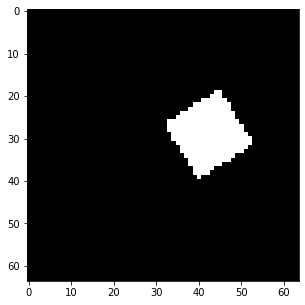

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(5, 5)) 
# Get a batch of data
for batch, labels in train_loader:
    break
plt.imshow(batch[0,0,:,:],cmap="gray")
# print(batch.shape,batch.min(),batch.max())
# #get best model,easrly stopping
# viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
#recon = viz.reconstructions(batch.to(dtype=torch.float32))

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].min())
# recon[:,:,:]=recon[:,:,:]
print(recon.shape)
plt.imshow(np.array(recon[0,:,:]).astype(float),cmap="gray",vmin=0, vmax=1)

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")




In [8]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.unsqueeze(test_batch[0],1).cuda().to(dtype=torch.float32))

print(mask,len(torch.nonzero(mask[0]==0)))

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
    

NameError: name 'model' is not defined

In [ ]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist, mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist,mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)

In [ ]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

In [ ]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

In [ ]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

# face
fig = plt.figure(figsize=(50, 50)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

In [ ]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

In [ ]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
show_idx(mask)
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

In [ ]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")

show_idx(mask)
    

In [ ]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [ ]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [ ]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)